In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

In [4]:
import torch
print(torch.cuda.is_available())  # 應該返回 True
print(torch.version.cuda)         # 顯示 PyTorch 使用的 CUDA 版本


False
None


In [2]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
alexnet = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

C:\Users\yifun\AppData\Roaming\Python\Python38\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\yifun\AppData\Roaming\Python\Python38\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\yifun/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:05<00:00, 31.1MB/s] 


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms 
preprocess = transforms.Compose([ # 針對欲輸入的模型先定義好處理的規範
    transforms.Resize(256), # 轉換圖片尺寸:256 x 256
    transforms.CenterCrop(224),  # 再將圖片裁切為224 x 224
    transforms.ToTensor(),       # 轉換為張量(3D):RGB、高、寬
    transforms.Normalize(        # 進行正規化處理:使值滿足我們設定的平均值&標準差
        mean = [0.485,0.456,0.406],
        std = [0.229,0.224,0.225]
    )
])

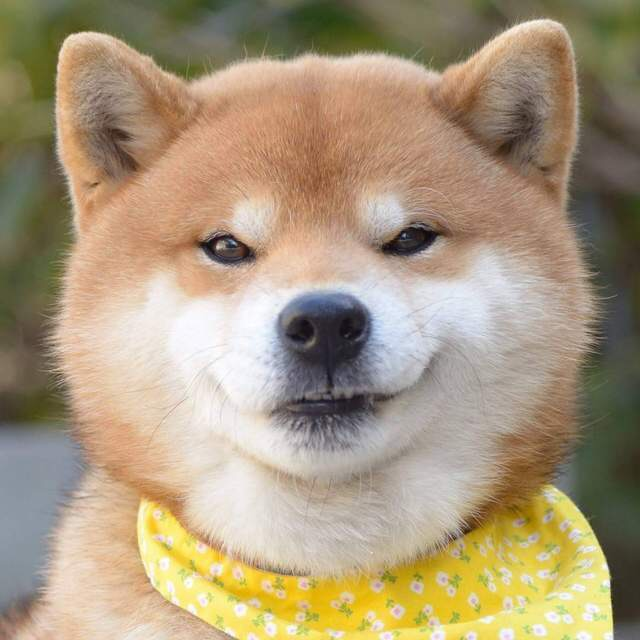

In [7]:
from PIL import Image
ima = Image.open('柴.jpg')
ima

In [9]:
ima_t = preprocess(ima) # 利用先前定義好的規範去處理圖片
ima_t.shape

torch.Size([3, 224, 224])

ResNet 規定必須輸入為4D array，所以要再做些處理，目前ima_t 是一個3D array

利用unsqueeze()在ima_t的第0階增加一個階，這邊代表批次量(圖片張數)，即可變成4D

In [13]:
import torch
batch_t = torch.unsqueeze(ima_t,0) # 在index位置0的地方增加一個rank
batch_t.shape

torch.Size([1, 3, 224, 224])

### 運行模型

用pretrained 完的模型來預測新資料，稱為推論(inference)

要進行inference，要先將模型設為eval

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
# 模式已轉換完，即可開始處理資料
out = resnet(batch_t)
out

tensor([[ 6.8127e-01,  1.6240e+00,  1.7601e-01, -2.3086e+00, -2.5510e+00,
          1.3753e-02, -1.9656e+00, -1.7404e+00,  1.4882e-01, -2.4191e+00,
          1.0384e+00,  9.3479e-02, -1.9600e+00,  5.8610e-01, -1.2712e-01,
         -1.0284e+00,  1.9007e-01,  3.0136e+00,  4.7953e-01,  2.5699e-01,
         -9.4067e-01, -1.0927e+00, -1.6584e+00, -1.1584e+00, -2.3918e+00,
         -9.3326e-01, -5.9997e-01, -3.1783e-01, -5.8739e-02, -1.1536e+00,
         -8.5092e-01, -1.6672e+00, -5.7645e-01, -2.1085e-01, -2.7577e-01,
         -1.2039e+00, -4.7022e-01, -5.6116e-01,  2.8155e-01, -1.5561e+00,
          4.6425e-01, -6.8233e-01,  1.1719e+00, -8.9807e-01, -1.1079e+00,
         -4.3267e-01, -2.4754e-01,  4.7319e-01, -3.1597e+00, -6.8722e-01,
          1.3732e-01, -1.0565e+00,  3.1496e-02, -1.1464e+00,  6.1988e-02,
         -2.3167e-01, -1.8631e-01,  1.5128e-01, -9.8157e-01, -1.3662e+00,
         -4.8315e-02, -1.7930e+00, -1.5328e-01,  2.3663e-01,  7.5880e-01,
          9.6701e-02,  2.5793e-01,  4.

In [16]:
# 載入擁有1000個標籤名稱的文字檔
with open('imagenet_classes.txt') as f:
    labels = [i.strip() for i in f.readlines()]

In [17]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

利用索引值找出txt中對應的標籤

In [18]:
_, index = torch.max(out,1) # 找出out此張量的第一軸中，最大值的Index

In [22]:
index # 1D tensor

tensor([987])

In [23]:
index[0] # 提取出真實索引值

tensor(987)

In [21]:
percentage = torch.nn.functional.softmax(out,dim=1)[0]*100 # 此數值反映出模型認為輸出圖片屬於某類別的信心程度
labels[index[0]],percentage[index[0]].item()

('corn', 51.84965896606445)

抓出信心程度去做排列

In [25]:
_,indices = torch.sort(out,descending=True) # 高到低排序
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]]

[('corn', 51.84965896606445),
 ('ear, spike, capitulum', 33.33981704711914),
 ('Eskimo dog, husky', 4.264086723327637),
 ('Pembroke, Pembroke Welsh corgi', 2.1112091541290283),
 ('dingo, warrigal, warragal, Canis dingo', 1.8908592462539673)]

## 將馬變成斑馬

In [27]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): 

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) 
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): 
        return self.model(input)

In [28]:
netG = ResNetGenerator()

套用一個在dataset預先訓練過的生generator model:已經針對將馬轉為斑馬做訓練的.pth(pickle檔)

In [33]:
model_path = r'C:\Users\yifun\Desktop\資管碩_訓練菜單\horse2zebra_0.3.1.pth'

state_dict = torch.load(model_path)
keys_to_remove = [key for key in state_dict if "running_mean" in key or "running_var" in key]
for key in keys_to_remove:
    del state_dict[key]
netG.load_state_dict(state_dict) # 將訓練過的參數載入至netG中


<All keys matched successfully>

In [34]:
netG.eval() # 再將網路切換到eval()模式

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [35]:
from PIL import Image
from torchvision import transforms
preprocess = transforms.Compose([transforms.Resize(256), # 先針對圖片做預設處理
                                 transforms.ToTensor()])

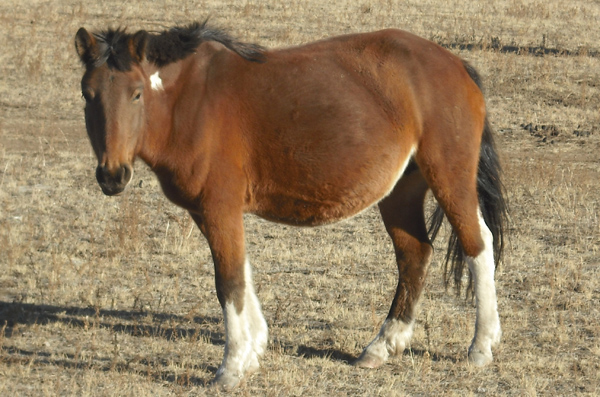

In [36]:
img = Image.open("horse.jpg")
img

In [37]:
img_t = preprocess(img) # 處理圖片
batch_t = torch.unsqueeze(img_t, 0) # 在第0階新增一個batch axis，變成四維tensor

In [38]:
batch_out = netG(batch_t) # 將4d tensor 丟入到訓練好的網路中，丟入後即是generator的輸出結果

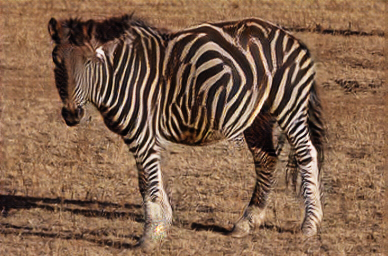

In [39]:
batch_out = torch.squeeze(batch_out,0) # 將第0階去除，變回3d tensor
batch_out = (batch_out+1.0)/2.0 # 調整照片明暗度
out_img = transforms.ToPILImage()(batch_out) # 轉成圖片
out_img